In [1]:
#importing libraries
import numpy as np
import pandas as pd
from pandas import read_excel
from pandas import read_csv

In [2]:
from io import StringIO
from pandas import read_excel, to_datetime


In [71]:
import tensorflow as tf

In [72]:
import keras
from keras import backend

In [3]:
import random
random.seed(42)

In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
#loading the dataset
Anand_Vihar=pd.read_csv("C:/Users/hp/Desktop/Delhi_Air_Quality_24hr_avg_Anand_Vihar_2015_16.csv",encoding = "ISO-8859-1")
air_poll = np.array(Anand_Vihar)#creating numpy array
np.random.seed(100)#initializing with random values
air_poll
new = Anand_Vihar["Date"].str.split("/",-1,expand=True)#converting the date column into float type for processing
Anand_Vihar["Day"] = new[0]
Anand_Vihar["Month"] = new[1]
Anand_Vihar["Year"] = new[2]
Anand_Vihar.drop("Date", inplace =True,axis=1)
print(Anand_Vihar.head())

     PM10   PM2.5  Ozone  Ammonia   BarPressure   SolarRadiation  \
0  166.93   54.21  28.15    25.69         740.0           256.38   
1  260.41  100.50  26.79    32.94         740.0           174.72   
2  482.61   83.02  10.17    19.10         740.0           195.47   
3  442.78  114.30  13.88    21.90         740.0           218.36   
4  671.70  251.78  13.12    34.07         740.0           190.72   

    RelativeHumidity   PXylene  Toulene   AmbientTemperature  WindDirection  \
0              59.87      2.99    10.27                23.28         131.07   
1              69.64      1.29    10.60                20.74         124.15   
2              31.26      4.15    11.10                30.16         263.99   
3              36.18      3.12     9.84                29.81         256.34   
4              36.42      3.80    16.47                29.92         160.78   

   WindSpeed  SulphurDioxide  OxidesOfNitrogen  NitrogenDioxide  Benzene  \
0       1.48           31.30            

In [10]:
#replacing the null values with 0
na_filled=Anand_Vihar.fillna(method = 'bfill', axis=0).fillna(0)
new_data = np.array(na_filled)
#creating a dataframe
df = pd.DataFrame(new_data,columns=['PM10','PM2.5','Ozone','Ammonia','BarPressure','SolarRadiation','RelativeHumidity',
                                       'PXylene','Toulene','AmbientTemperature','WindDirection','WindSpeed',
                                       'SulphurDioxide','OxidesOfNitrogen','NitrogenDioxide','Benzene','NitricOxide','Day','Month','Year'],copy=False)
df

,PM10,PM2.5,Ozone,Ammonia,BarPressure,SolarRadiation,RelativeHumidity,PXylene,Toulene,AmbientTemperature,WindDirection,WindSpeed,SulphurDioxide,OxidesOfNitrogen,NitrogenDioxide,Benzene,NitricOxide,Day,Month,Year
0,166.93,54.21,28.15,25.69,740,256.38,59.87,2.99,10.27,23.28,131.07,1.48,31.3,71.09,55.13,2.04,17.55,04,04,2015
1,260.41,100.5,26.79,32.94,740,174.72,69.64,1.29,10.6,20.74,124.15,0.91,49.68,60.74,50.65,4.39,14.14,05,04,2015
2,482.61,83.02,10.17,19.1,740,195.47,31.26,4.15,11.1,30.16,263.99,1.5,14.93,88.52,79.48,3.15,26.31,09,04,2015
3,442.78,114.3,13.88,21.9,740,218.36,36.18,3.12,9.84,29.81,256.34,1.26,11.17,88.5,77.1,3.18,25.48,10,04,2015
4,671.7,251.78,13.12,34.07,740,190.72,36.42,3.8,16.47,29.92,160.78,0.97,28.1,94.08,85.62,5.4,16.94,11,04,2015
5,161.8,64.32,10.91,35.03,740,166.27,53.08,1.25,10.97,24.3,151.32,1.77,22.88,68.94,61.65,1.86,13.48,12,04,2015
6,161.8,110.57,15.89,40.28,740,220.57,58.09,1.92,16.19,24.91,118.04,2.01,14.95,65.21,53.87,2.75,12.58,13,04,2015
7,247.32,85.98,12.53,31.52,740,222.34,51.91,2.3,14.17,27.01,92.46,2.22,12.52,57.69,47.47,2.13,11.4,14,04,2015
8,392.29,118.89,10.57,33.08,740,13.64,53.99,3.2,13.7,26.89,133.69,1.01,15.88,71.82,61.52,3.07,15.33,15,04,2015
9,337.9,105.69,13.37,29.59,740,218.61,51.23,1.5,16.29,26.82,174.51,1.52,23.57,61.81,46.57,2.48,15.59,16,04,2015


In [12]:
df['PPR1'] = np.where(df['Ammonia'].shift(-1) > df['Ammonia'], 1, 0)

In [14]:
X = df.drop(['PPR1','PM10','PM2.5','Ozone','Ammonia','PXylene','Toulene', 'SulphurDioxide','OxidesOfNitrogen','NitrogenDioxide','Benzene','NitricOxide','Day','Month'],axis=1)
y = df['PPR1']#dependent variable

In [15]:
y.astype(float), X.astype(float)#converting the values into float type for processing

(0      1.0
 1      0.0
 2      1.0
 3      1.0
 4      1.0
 5      1.0
 6      0.0
 7      1.0
 8      0.0
 9      0.0
 10     0.0
 11     1.0
 12     0.0
 13     0.0
 14     0.0
 15     1.0
 16     1.0
 17     1.0
 18     0.0
 19     0.0
 20     0.0
 21     0.0
 22     1.0
 23     0.0
 24     1.0
 25     1.0
 26     1.0
 27     1.0
 28     0.0
 29     0.0
       ... 
 254    0.0
 255    1.0
 256    1.0
 257    1.0
 258    1.0
 259    1.0
 260    0.0
 261    0.0
 262    1.0
 263    1.0
 264    0.0
 265    0.0
 266    0.0
 267    0.0
 268    0.0
 269    0.0
 270    1.0
 271    0.0
 272    0.0
 273    0.0
 274    1.0
 275    1.0
 276    1.0
 277    0.0
 278    0.0
 279    1.0
 280    0.0
 281    1.0
 282    1.0
 283    0.0
 Name: PPR1, Length: 284, dtype: float64,
      BarPressure  SolarRadiation  RelativeHumidity  AmbientTemperature  \
 0          740.0          256.38             59.87               23.28   
 1          740.0          174.72             69.64               20.74   
 

In [17]:
#splitting the dataset into train and test sets 
split = int(len(df)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [18]:
from sklearn import svm

In [19]:
#importing the support vector classifier and setting up a linear kernel
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred = svclassifier.predict(X_test)#predicting the value from testing set

In [22]:
df['y_pred'] = np.NaN
df.iloc[(len(df) - len(y_pred)):,-1:] = y_pred
pollution_dataset = df.dropna()

In [23]:
#calculating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print (accuracy)

0.578947368421


In [24]:
#calculating the f1-score
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[15 13]
 [11 18]]
             precision    recall  f1-score   support

          0       0.58      0.54      0.56        28
          1       0.58      0.62      0.60        29

avg / total       0.58      0.58      0.58        57



In [37]:
pollution_dataset['Predicted Pollution'] = 0.
#transforming the data into logarithm values
pollution_dataset['Predicted Pollution'] = np.log(pollution_dataset['Ammonia']/pollution_dataset['Ammonia'].shift(1))
pollution_dataset['Predicted Pollution'] = pollution_dataset['Predicted Pollution'].shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


AttributeError: 'float' object has no attribute 'log'

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
from sklearn import metrics

In [28]:
#calculating the mean square error
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.421052631579
0.421052631579
0.648885684523


In [35]:
pollution_dataset['Orignal_pollution'] =pollution_dataset['Ammonia']
pollution_dataset['Pollution_prediction'] = (pollution_dataset['Predicted Pollution']*pollution_dataset['Ammonia'])+pollution_dataset['Ammonia']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
#root mean squared error calculation
pollution_dataset['RMSE'] = np.sqrt(((pollution_dataset['Ammonia']-pollution_dataset['Pollution_prediction'])**2).mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
#mean absolute percentage error calculation
pollution_dataset['MAPE'] = np.mean(np.abs((pollution_dataset['Ammonia'] - pollution_dataset['Pollution_prediction']) / pollution_dataset['Ammonia'])) * 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
pollution_dataset.head()


,PM10,PM2.5,Ozone,Ammonia,BarPressure,SolarRadiation,RelativeHumidity,PXylene,Toulene,AmbientTemperature,...,Day,Month,Year,PPR1,y_pred,Predicted Pollution,Orignal_pollution,Pollution_prediction,RMSE,MAPE
227,415.42,228.71,21.84,96.63,740,222.52,71.68,2.64,1.42,19.41,...,28,11,2015,1,0.0,0.0,96.63,96.63,0.0,0.0
228,918.68,372.46,20.86,97.99,740,170.05,66.26,2.64,10.57,21.81,...,29,11,2015,1,1.0,0.0,97.99,97.99,0.0,0.0
229,874.16,449.5,52.06,115.7,740,165.05,69.95,3.86,15.26,21.49,...,30,11,2015,0,1.0,0.0,115.7,115.7,0.0,0.0
230,632.58,260.02,14.19,94.62,740,165.94,65.56,0.82,8.36,20.91,...,01,12,2015,0,1.0,0.0,94.62,94.62,0.0,0.0
231,705.04,228,14.75,77.74,740,165.39,50.57,0.78,6.39,20.71,...,02,12,2015,1,1.0,0.0,77.74,77.74,0.0,0.0


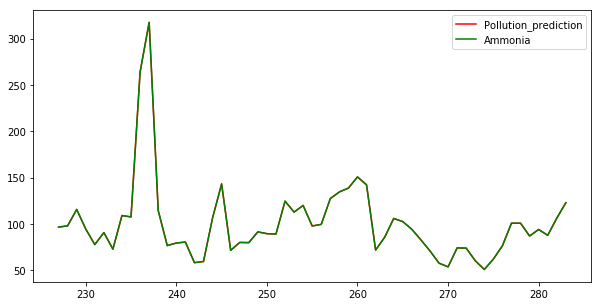

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(pollution_dataset['Pollution_prediction'], color='r', label='Pollution_prediction')
plt.plot(pollution_dataset['Ammonia'], color='g', label='Ammonia')
plt.legend()
plt.show()